# Load Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [ ]:
totalClass = 9
shufflePixels = True
shuffleLabels = False

In [ ]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(45000, 32, 32, 3)
(45000, 32, 32, 3)
(45000, 9)
(9000, 32, 32, 3)
(9000, 9)


Populating the interactive namespace from numpy and matplotlib


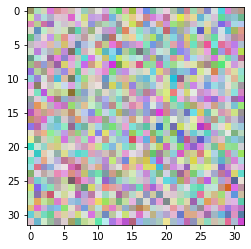

In [ ]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

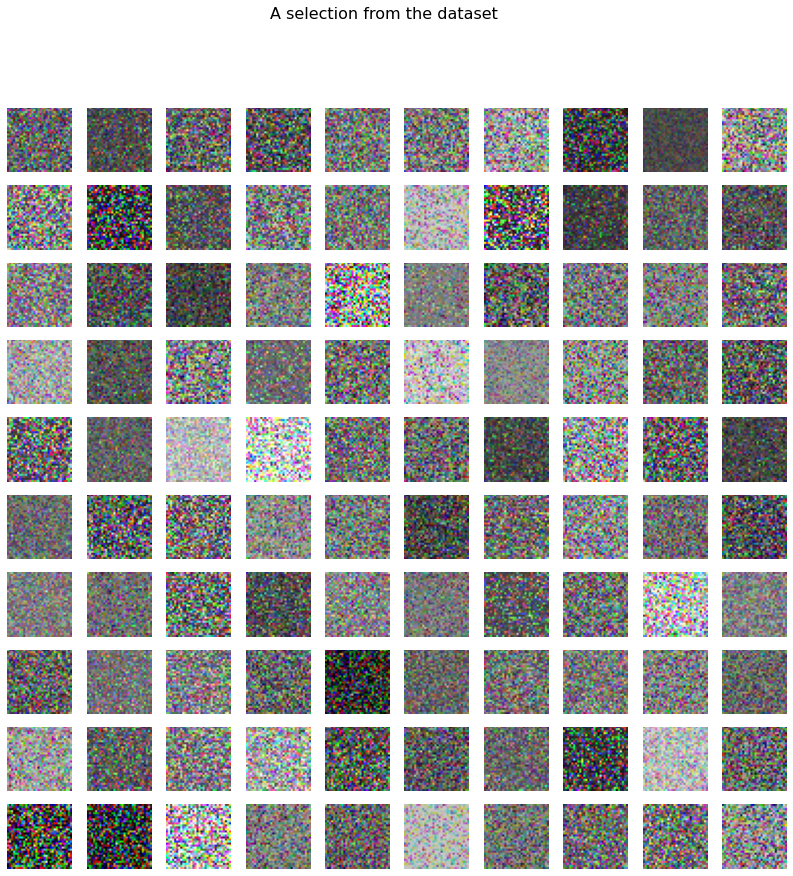

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [ ]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 13s 45ms/step - loss: 2.2048 - accuracy: 0.1111
test loss, test acc: [2.2048046588897705, 0.1111111119389534]
Evaluate on test data
18/18 [==============================] - 1s 76ms/step - loss: 2.2049 - accuracy: 0.1111
test loss, test acc: [2.204850912094116, 0.1111111119389534]


In [ ]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
450/450 [==============================] - 17s 33ms/step - loss: 2.1645 - accuracy: 0.1501 - val_loss: 2.1429 - val_accuracy: 0.1657
Epoch 2/250
450/450 [==============================] - 14s 31ms/step - loss: 2.1385 - accuracy: 0.1691 - val_loss: 2.1294 - val_accuracy: 0.1701
Epoch 3/250
450/450 [==============================] - 14s 31ms/step - loss: 2.1284 - accuracy: 0.1780 - val_loss: 2.1666 - val_accuracy: 0.1562
Epoch 4/250
450/450 [==============================] - 14s 31ms/step - loss: 2.1215 - accuracy: 0.1855 - val_loss: 2.1196 - val_accuracy: 0.1987
Epoch 5/250
450/450 [==============================] - 14s 31ms/step - loss: 2.1148 - accuracy: 0.1919 - val_loss: 2.1127 - val_accuracy: 0.2002
Epoch 6/250
450/450 [==============================] - 15s 32ms/step - loss: 2.1092 - accuracy: 0.1955 - val_loss: 2.0914 - val_accuracy: 0.1996
Epoch 7/250
450/450 [==============================] - 14s 31ms/step - loss: 2.1018 - accuracy: 0.2006 - val_loss: 2.0878 - val_ac

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 3s 31ms/step - loss: 0.0089 - accuracy: 0.9972
test loss, test acc: [0.00886098388582468, 0.9972222447395325]
Evaluate on test data
18/18 [==============================] - 1s 31ms/step - loss: 10.4863 - accuracy: 0.1342
test loss, test acc: [10.486297607421875, 0.13422222435474396]


# Small

In [ ]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 1s 8ms/step - loss: 25.9700 - accuracy: 0.1086
test loss, test acc: [25.969955444335938, 0.10859999805688858]
Evaluate on test data
18/18 [==============================] - 0s 12ms/step - loss: 26.2191 - accuracy: 0.1092
test loss, test acc: [26.219093322753906, 0.10922222584486008]


In [ ]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
450/450 [==============================] - 4s 8ms/step - loss: 3.6573 - accuracy: 0.1228 - val_loss: 2.1746 - val_accuracy: 0.1409
Epoch 2/250
450/450 [==============================] - 3s 7ms/step - loss: 2.1782 - accuracy: 0.1400 - val_loss: 2.1547 - val_accuracy: 0.1520
Epoch 3/250
450/450 [==============================] - 3s 7ms/step - loss: 2.1664 - accuracy: 0.1464 - val_loss: 2.1437 - val_accuracy: 0.1684
Epoch 4/250
450/450 [==============================] - 3s 8ms/step - loss: 2.1620 - accuracy: 0.1535 - val_loss: 2.1469 - val_accuracy: 0.1713
Epoch 5/250
450/450 [==============================] - 3s 8ms/step - loss: 2.1570 - accuracy: 0.1555 - val_loss: 2.1401 - val_accuracy: 0.1756
Epoch 6/250
450/450 [==============================] - 3s 7ms/step - loss: 2.1511 - accuracy: 0.1608 - val_loss: 2.1422 - val_accuracy: 0.1734
Epoch 7/250
450/450 [==============================] - 3s 8ms/step - loss: 2.1455 - accuracy: 0.1639 - val_loss: 2.1339 - val_accuracy: 0.1752

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 1s 7ms/step - loss: 1.9062 - accuracy: 0.3163
test loss, test acc: [1.9062275886535645, 0.3163111209869385]
Evaluate on test data
18/18 [==============================] - 0s 8ms/step - loss: 2.3613 - accuracy: 0.1470
test loss, test acc: [2.361318349838257, 0.1469999998807907]


#tNet

In [ ]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 5s 48ms/step - loss: 3.1099 - accuracy: 0.1109
test loss, test acc: [3.109896421432495, 0.1109333336353302]
Evaluate on test data
18/18 [==============================] - 1s 64ms/step - loss: 3.1256 - accuracy: 0.1098
test loss, test acc: [3.1255719661712646, 0.1097777783870697]


In [ ]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
450/450 [==============================] - 20s 42ms/step - loss: 2.2217 - accuracy: 0.1785 - val_loss: 2.0981 - val_accuracy: 0.2066
Epoch 2/250
450/450 [==============================] - 18s 40ms/step - loss: 2.0705 - accuracy: 0.2137 - val_loss: 2.0862 - val_accuracy: 0.1970
Epoch 3/250
450/450 [==============================] - 18s 40ms/step - loss: 1.9973 - accuracy: 0.2480 - val_loss: 2.1129 - val_accuracy: 0.2047
Epoch 4/250
450/450 [==============================] - 18s 41ms/step - loss: 1.8799 - accuracy: 0.3014 - val_loss: 2.1581 - val_accuracy: 0.1924
Epoch 5/250
450/450 [==============================] - 18s 40ms/step - loss: 1.7099 - accuracy: 0.3778 - val_loss: 2.2803 - val_accuracy: 0.1890
Epoch 6/250
450/450 [==============================] - 18s 41ms/step - loss: 1.5035 - accuracy: 0.4640 - val_loss: 2.4324 - val_accuracy: 0.1768
Epoch 7/250
450/450 [==============================] - 18s 41ms/step - loss: 1.2655 - accuracy: 0.5601 - val_loss: 2.6220 - val_ac

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 4s 41ms/step - loss: 0.0013 - accuracy: 0.9998
test loss, test acc: [0.0012938214931637049, 0.9997555613517761]
Evaluate on test data
18/18 [==============================] - 1s 40ms/step - loss: 6.9427 - accuracy: 0.1620
test loss, test acc: [6.942717552185059, 0.16200000047683716]


# ConvNet

In [ ]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 8s 70ms/step - loss: 3.4109 - accuracy: 0.1100
test loss, test acc: [3.4109389781951904, 0.1100444421172142]
Evaluate on test data
18/18 [==============================] - 2s 118ms/step - loss: 3.4082 - accuracy: 0.1100
test loss, test acc: [3.4082212448120117, 0.10999999940395355]


In [22]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
450/450 [==============================] - 20s 41ms/step - loss: 2.1550 - accuracy: 0.1714 - val_loss: 2.1293 - val_accuracy: 0.1863
Epoch 2/250
450/450 [==============================] - 18s 40ms/step - loss: 2.1097 - accuracy: 0.1986 - val_loss: 2.0918 - val_accuracy: 0.2088
Epoch 3/250
450/450 [==============================] - 18s 40ms/step - loss: 2.0921 - accuracy: 0.2000 - val_loss: 2.1289 - val_accuracy: 0.1992
Epoch 4/250
450/450 [==============================] - 18s 40ms/step - loss: 2.0860 - accuracy: 0.2037 - val_loss: 2.0837 - val_accuracy: 0.1966
Epoch 5/250
450/450 [==============================] - 18s 40ms/step - loss: 2.0815 - accuracy: 0.2047 - val_loss: 2.0762 - val_accuracy: 0.1983
Epoch 6/250
450/450 [==============================] - 18s 40ms/step - loss: 2.0785 - accuracy: 0.2042 - val_loss: 2.0743 - val_accuracy: 0.2106
Epoch 7/250
450/450 [==============================] - 18s 40ms/step - loss: 2.0747 - accuracy: 0.2054 - val_loss: 2.0725 - val_ac

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 4s 50ms/step - loss: 0.0725 - accuracy: 0.9732
test loss, test acc: [0.07253319025039673, 0.9731555581092834]
Evaluate on test data
18/18 [==============================] - 1s 50ms/step - loss: 6.0879 - accuracy: 0.1711
test loss, test acc: [6.0879435539245605, 0.1711111068725586]


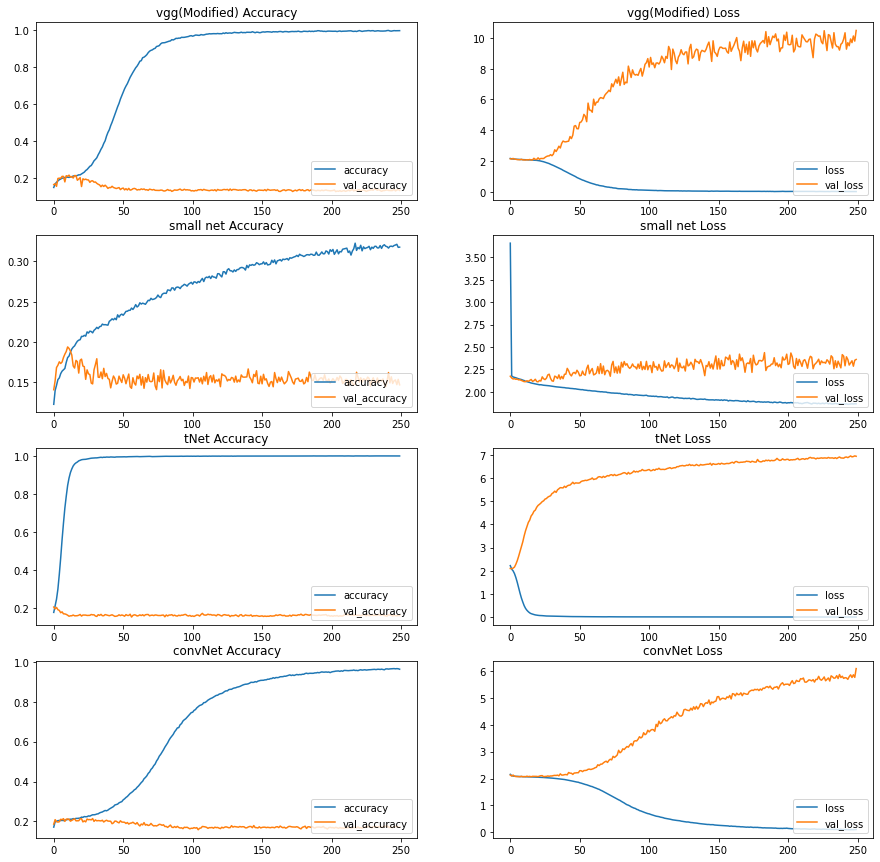

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
